In [3]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import kstest
import plotly.express as px
import plotly.graph_objects as go
import openpyxl
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import time 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

SEED = 42



# Datanın Yüklenmesi

In [4]:
best = pd.read_csv('C:/Users/eddem/chippin/cust_best_sample.csv') 
cust = pd.read_csv('C:/Users/eddem/Chippin/cust_sample.csv') 
trx = pd.read_csv('C:/Users/eddem/Chippin/trx_sample.csv') 

- best dataseti 3 kolondan oluşmaktadır.
- Gender Çoğunlukla UNKNOWN
- date_of_birth kolonunda 130536 adet null değer var.
- date_of_birth datada doğru olmayan doğum tarihleri var (2069, 2055)

In [5]:
best.info()
print(best.isnull().sum())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133074 entries, 0 to 133073
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   unique_customer_id  133074 non-null  uint64
 1   gender              133074 non-null  object
 2   date_of_birth       2538 non-null    object
dtypes: object(2), uint64(1)
memory usage: 3.0+ MB
unique_customer_id         0
gender                     0
date_of_birth         130536
dtype: int64


In [5]:
best[best["date_of_birth"]> "2015-01-01"] 

,unique_customer_id,gender,date_of_birth
14,10760773275552365563,UNKNOWN,2069-08-14
520,7119492680593736990,UNKNOWN,2055-08-30
1294,17932542875492193526,UNKNOWN,2070-04-04
1579,12016634096935283071,UNKNOWN,2059-10-06
1810,14012553068184773835,UNKNOWN,2070-07-03
...,...,...,...
131298,3048551069142546515,UNKNOWN,2058-09-15
131993,16827578878166608146,UNKNOWN,2069-03-11
132014,2386529878023270049,UNKNOWN,2065-03-02
132756,13781583181726588381,UNKNOWN,2070-05-20


In [6]:
merged_trx = pd.merge(trx, cust, on='cb_customer_id', how='inner')
df = pd.merge(merged_trx, best, on='unique_customer_id', how='left')
df.drop_duplicates(inplace=True)
df_copy = df.copy()
df_copy.head()

,cb_customer_id,transaction_date,amount_after_discount,cb_branch_id,amount_before_discount,amount_discount,unique_customer_id,gender,date_of_birth
0,6821860387409851780,2016-07-26,-0.327119,90,-0.411608,-0.443104,14833856522183602191,UNKNOWN,NaN
1,6821860387409851780,2016-08-02,-0.327119,90,-0.411608,-0.443104,14833856522183602191,UNKNOWN,NaN
2,3372770238413923649,2016-06-20,-0.389015,26,-0.331083,-0.281383,219680563978627406,UNKNOWN,NaN
3,3220055865641973068,2016-06-15,-0.344771,90,-0.447712,-0.488551,13102778631438780637,UNKNOWN,NaN
4,1603206957613929399,2016-06-20,-1.139010,33,-1.580552,-1.771293,13698985552782800647,UNKNOWN,NaN


<AxesSubplot:xlabel='count', ylabel='gender'>

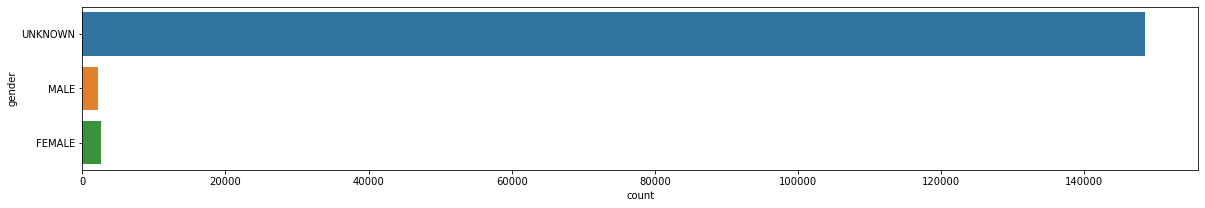

In [18]:
fig = plt.figure(figsize=(20,3))
sns.countplot(y="gender", data=df_copy)

In [7]:
# UNKNOWN tanımlı satırları na olarak atadım.
df_copy['gender'] = df_copy['gender'].replace('UNKNOWN', np.nan)

# Data Exploration and Cleaning

In [8]:
print("#### Tanımlayıcı İstatistikler ###")
df_copy.describe()
print(df_copy .isnull().sum())  

#### Tanımlayıcı İstatistikler ###
cb_customer_id                 0
transaction_date               0
amount_after_discount          0
cb_branch_id                   0
amount_before_discount         0
amount_discount                0
unique_customer_id             0
gender                    148465
date_of_birth             149917
dtype: int64


In [9]:
print("#### Veri Türleri ###")
print(df_copy .info())  

#### Veri Türleri ###
<class 'pandas.core.frame.DataFrame'>
Int64Index: 153213 entries, 0 to 153531
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cb_customer_id          153213 non-null  uint64 
 1   transaction_date        153213 non-null  object 
 2   amount_after_discount   153213 non-null  float64
 3   cb_branch_id            153213 non-null  int64  
 4   amount_before_discount  153213 non-null  float64
 5   amount_discount         153213 non-null  float64
 6   unique_customer_id      153213 non-null  uint64 
 7   gender                  4748 non-null    object 
 8   date_of_birth           3296 non-null    object 
dtypes: float64(3), int64(1), object(3), uint64(2)
memory usage: 11.7+ MB
None


In [10]:
print("#### NULL değerler  ###")
print(df_copy.isnull().sum())  

#### NULL değerler  ###
cb_customer_id                 0
transaction_date               0
amount_after_discount          0
cb_branch_id                   0
amount_before_discount         0
amount_discount                0
unique_customer_id             0
gender                    148465
date_of_birth             149917
dtype: int64


 # Veri Tipi Duzenleme /Null değerlere bakma
 

- transaction_date ve date_of_birth datetime olarak atandı.
- date_of_birth 149.917 satırın null olduğu bulundu
- gender sütunundaki 148.465 satır null olduğu bulundu
- **date_of_birth** ve **gender** sütunları kaldırıldı.

In [11]:
# Data tipini tarih olarak düzeltim
df_copy['transaction_date'] = pd.to_datetime(df_copy['transaction_date'])
df_copy["date_of_birth"]= pd.to_datetime(df_copy["date_of_birth"])

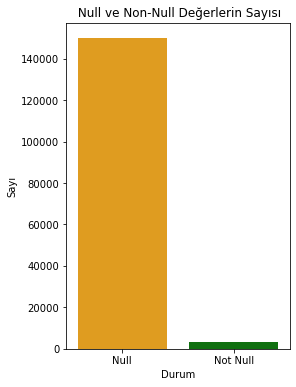

In [12]:
df['birtd_date_status'] = df['date_of_birth'].isnull().map({True: 'Null', False: 'Not Null'})
#date_of_birth'deki null olan ve olamyan değerleri görselleştirdim.
plt.figure(figsize=(4,6))
sns.countplot(x='birtd_date_status', data=df, palette={'Null': 'orange', 'Not Null': 'green'})
plt.xlabel("Durum")
plt.ylabel("Sayı")
plt.title(" Null ve Non-Null Değerlerin Sayısı")
plt.show()

In [13]:
df_copy.drop(columns=['date_of_birth',"gender"], inplace=True)


# Feature Engineering

- Müşteri bazlı uğradıkları distinct şube sayısını bulup  branch_count kolonuna atadım.
- Kişi bazlı toplam indirim sayısını bulup discount_sum kolonuna atadım.
- Monetary_beforeDis değişkenini ise, kişi bazlı indirim öncesi harcamayı toplayarak buldum.
- RFM yapısını oluşturarak Recency, Frequency, Monetary değerlerini buldum.
- Ardından Recency ve Frequency skorlarına bakarak kişilere RF skoru atadım.
- Ardından bu değerleri  Churn, at_risk ve loyal_customers gibi kategorilere atadım.

In [14]:
# uğradıkları şube sayısının eklenmesi:
df_copy['branch_count'] = df_copy.groupby('unique_customer_id')['cb_branch_id'].transform('nunique')
# indirimlerin toplanması
df_copy['discount_sum'] = df_copy.groupby('unique_customer_id')['amount_discount'].transform('sum')
# indirim öncesi harcamalarının toplanması
df_copy['Monetary_beforeDis'] = df_copy.groupby('unique_customer_id')['amount_before_discount'].transform('sum')

## RFM / Değişken Üretme


In [15]:
# Datasetindeki maksimum tarihi almak için yaptım.
max_date = df_copy['transaction_date'].max() 

# Recency icin;
rfm_data = df_copy.groupby('unique_customer_id').agg({
    'transaction_date': lambda x: x.max(), 
})

rfm_data['Recency'] = (max_date - rfm_data['transaction_date']).dt.days
rfm_data.drop(columns='transaction_date', inplace=True)

# Frequency icin:
freq_data = df_copy.groupby('unique_customer_id').agg({
    'transaction_date': 'count'
}).rename(columns={'transaction_date': 'Frequency'})

# Monetary icin:
mon_data = df_copy.groupby('unique_customer_id').agg({
    'amount_after_discount': 'sum'
}).rename(columns={'amount_after_discount': 'Monetary'})

# Joinleme
rfm = rfm_data.join(freq_data).join(mon_data)

##### Skorları Atamak İcin;
## Recency Skoru icin;
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
## Frequency Skoru İcin;
bins = [0, 1, 2, 3, 5, np.inf]
labels = [1, 2, 3, 4, 5]
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=bins, labels=labels)
## Monetary Skoru İcin;
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

## Skorların birlestirilmesi
rfm['RF_Score'] = rfm['R_Score'].astype(str) + \
                   rfm['F_Score'].astype(str) 

## Skorlara uydun segmentleri atamak icin;
seg_map = {
    r'[1-2][1-2]': 'Churn',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['RF_segment'] = rfm['RF_Score'].replace(seg_map, regex=True)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RF_Score,RF_segment
unique_customer_id,,,,,,,,
288512277526182,91,3,0.631865,4,3,5,43,potential_loyalists
442982885829789,80,1,-0.380075,4,1,2,41,promising
494952537561067,74,2,-1.219022,4,2,1,42,potential_loyalists
619564307179957,32,1,0.277410,5,1,4,51,new_customers
644980618238310,107,1,2.564931,3,1,5,31,about_to_sleep


In [16]:
## Segmentlere göre sayı ve ortalamalara bakmak icin;
rfm.groupby("RF_segment").agg({"Recency": "mean",
                            "Frequency": "mean",
                            "Monetary": ["mean","count"]})

Recency Frequency  Monetary       
                           mean      mean      mean  count
RF_segment                                                
Churn                130.626196  1.083863  0.109947  51000
about_to_sleep       101.602714  1.107197  0.092080  25206
at_Risk              128.235919  3.196599 -0.777250    941
cant_loose           123.500000  7.909091 -2.770088     22
champions             22.198718  6.858974 -1.345816    156
loyal_customers       91.668192  4.693364 -0.928401    437
need_attention       101.637255  3.000000 -0.482807    612
new_customers         30.789552  1.000000 -0.159222  24063
potential_loyalists   58.997075  2.168183 -0.480716   6154
promising             84.035208  1.000000  0.022703  24483

In [17]:
# rfm ve df_copy birleştirmek icin;
data = pd.merge(df_copy, rfm, on='unique_customer_id', how='left')


In [18]:
data.head()

,cb_customer_id,transaction_date,amount_after_discount,cb_branch_id,amount_before_discount,amount_discount,unique_customer_id,branch_count,discount_sum,Monetary_beforeDis,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RF_Score,RF_segment
0,6821860387409851780,2016-07-26,-0.327119,90,-0.411608,-0.443104,14833856522183602191,1,-0.886209,-0.823217,45,2,-0.654238,5,2,1,52,potential_loyalists
1,6821860387409851780,2016-08-02,-0.327119,90,-0.411608,-0.443104,14833856522183602191,1,-0.886209,-0.823217,45,2,-0.654238,5,2,1,52,potential_loyalists
2,3372770238413923649,2016-06-20,-0.389015,26,-0.331083,-0.281383,219680563978627406,1,-0.281383,-0.331083,88,1,-0.389015,4,1,2,41,promising
3,3220055865641973068,2016-06-15,-0.344771,90,-0.447712,-0.488551,13102778631438780637,1,-0.488551,-0.447712,93,1,-0.344771,3,1,2,31,about_to_sleep
4,1603206957613929399,2016-06-20,-1.139010,33,-1.580552,-1.771293,13698985552782800647,1,-4.519687,-4.260102,85,4,-3.497043,4,4,1,44,loyal_customers


In [19]:
# Modellerde denemek icin ürettigim diger degiskenler
data['avg_amount_spent'] = data['Monetary'] / data['Frequency']
data['avg_discount'] = data['discount_sum'] / data['Frequency']
data["discount_rate"] = data['discount_sum'] / data['Monetary_beforeDis']
data["discount_per_branch"]  =  data['discount_sum']/  data['branch_count']
data["Monetary_branch"]  =  data['discount_sum']/  data['branch_count']
data['branch_discount_interaction'] = data['branch_count'] * data['discount_rate']
data['spend_ratio'] = data['Monetary'] / data['Monetary_beforeDis']
data['discount_impact'] = 1 - data['spend_ratio']

# Datanın dağılımı - Korelasyon Analizi

- Datanın normal dağılıma uygun olup olmadığına bakmak icin Kolmogorov-Smirnov normallik testi yaptım.
- Kolonların normal dağılmadığını gördüm.
- Korelasyon testinde ise oluşturulan değişkenlerin bazıları arasında güçlü korelasyonlar olduğu görülmüştür.

In [20]:
colum_in = ['amount_after_discount','amount_before_discount', 'amount_discount','discount_sum',  'Monetary_beforeDis', 'Monetary', 'avg_amount_spent', 'avg_discount',"discount_per_branch", "discount_rate","Monetary_branch",'branch_discount_interaction','spend_ratio','discount_impact']
# Kolmogorov-Smirnov 
for column in colum_in:
    stat, p = kstest(data[column], 'norm')
    print(f"{column} için Kolmogorov-Smirnov Testi: Test İstatistiği = {stat}, p-değeri = {p}")
    if p > 0.05:
        print(f"{column}: Normal dağılıma uygun.")
    else:
        print(f"{column}: Normal dağılıma uygun değil.")

amount_after_discount için Kolmogorov-Smirnov Testi: Test İstatistiği = 0.17792512606255673, p-değeri = 0.0
amount_after_discount: Normal dağılıma uygun değil.
amount_before_discount için Kolmogorov-Smirnov Testi: Test İstatistiği = 0.1667549947435718, p-değeri = 0.0
amount_before_discount: Normal dağılıma uygun değil.
amount_discount için Kolmogorov-Smirnov Testi: Test İstatistiği = 0.2124316853493105, p-değeri = 0.0
amount_discount: Normal dağılıma uygun değil.
discount_sum için Kolmogorov-Smirnov Testi: Test İstatistiği = 0.15569759224294744, p-değeri = 0.0
discount_sum: Normal dağılıma uygun değil.
Monetary_beforeDis için Kolmogorov-Smirnov Testi: Test İstatistiği = 0.17056352054330737, p-değeri = 0.0
Monetary_beforeDis: Normal dağılıma uygun değil.
Monetary için Kolmogorov-Smirnov Testi: Test İstatistiği = 0.18535669002132593, p-değeri = 0.0
Monetary: Normal dağılıma uygun değil.
avg_amount_spent için Kolmogorov-Smirnov Testi: Test İstatistiği = 0.19418353755505413, p-değeri = 0.0

sns.set()
sns.pairplot(data[colum_in], size = 2.5)
plt.show()

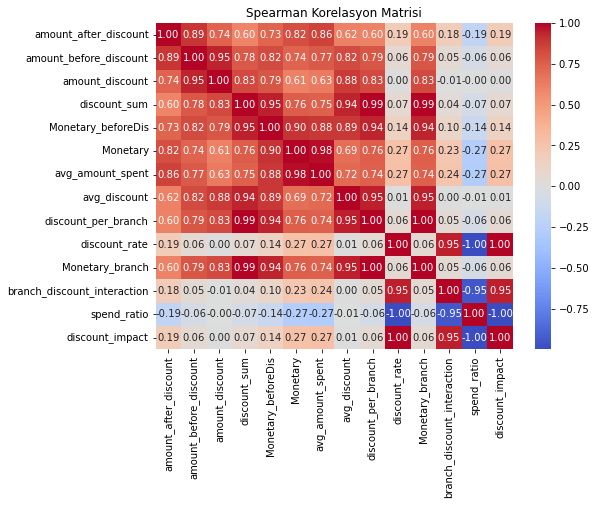

In [21]:
# Sürekli değişkenlerin seçimi ve korelasyon testi icin;
spearman_corr = data[colum_in].corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Korelasyon Matrisi")
plt.show()

# Churn modeli

- Churn modeli icin verilen datasetinde herhangi bir churn etiketi olmadığı için, RF skoru ile oluşturulan segmentlerden churn olanlar hedef değişken olarak seçilmiştir.
- Ardından kullanılabilecek değişkenler seçilmiştir. (Recency ve Frequency sadece CLV predictionda kullanılacak olup churn modelinde kullanılmayacaktır.)
- Veride dengesizlik vardır.

In [22]:
# RF segmentindeki Churn olanlar  hedef değişkene atanmıştır. 
data['churn_flag'] = np.where(data['RF_segment'] == "Churn", 1, 0)

# Gereksiz kolonları atmak için.
data_new = data[['branch_count','discount_sum',  'Recency','Frequency', ## Recency ve Frequecy CLV predictionda kullanılacaktır.
                  "unique_customer_id", "discount_rate","discount_per_branch",
                  'Monetary_beforeDis','Monetary','avg_amount_spent','avg_discount', 'churn_flag',
                    "Monetary_branch", 'branch_discount_interaction','spend_ratio','discount_impact']]
data_new.drop_duplicates(inplace=True)

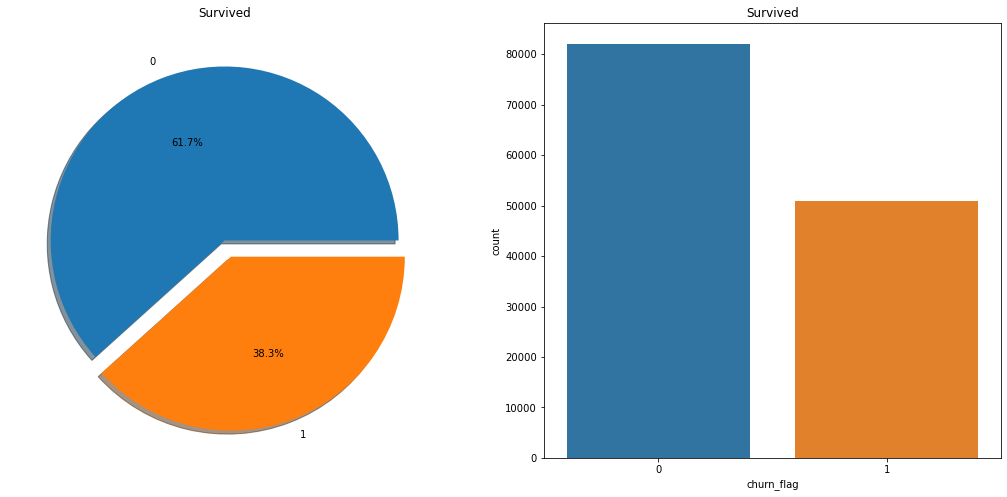

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_new['churn_flag'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
#sns.countplot('churn_flag',data_new,ax=ax[1])
sns.countplot(x='churn_flag', data=data_new, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [60]:
data_new.head()

,branch_count,discount_sum,Recency,Frequency,unique_customer_id,discount_rate,discount_per_branch,Monetary_beforeDis,Monetary,avg_amount_spent,avg_discount,churn_flag,Monetary_branch,branch_discount_interaction,spend_ratio,discount_impact
0,1,-0.886209,45,2,14833856522183602191,1.076519,-0.886209,-0.823217,-0.654238,-0.327119,-0.443104,0,-0.886209,1.076519,0.794733,0.205267
1,1,-0.281383,88,1,219680563978627406,0.849886,-0.281383,-0.331083,-0.389015,-0.389015,-0.281383,0,-0.281383,0.849886,1.174978,-0.174978
2,1,-0.488551,93,1,13102778631438780637,1.091217,-0.488551,-0.447712,-0.344771,-0.344771,-0.488551,0,-0.488551,1.091217,0.770073,0.229927
3,1,-4.519687,85,4,13698985552782800647,1.060934,-4.519687,-4.260102,-3.497043,-0.874261,-1.129922,0,-4.519687,1.060934,0.820882,0.179118
4,1,-0.092018,127,1,8221697626171255583,0.741746,-0.092018,-0.124056,-0.168271,-0.168271,-0.092018,1,-0.092018,0.741746,1.356414,-0.356414


In [24]:
# recency ve frequency data sızıntısı olmaması için çıkarılmıştır.

x = data_new[[  'branch_count','discount_sum',"unique_customer_id",  "discount_rate","discount_per_branch",
         'Monetary_beforeDis','Monetary' ,'avg_amount_spent','avg_discount','branch_discount_interaction',
         'spend_ratio','discount_impact'
]]

y = data_new[['churn_flag']]

x.drop_duplicates(inplace=True)

# Outlier  için;

In [25]:
def handle_outliers(Train_val, columns):
    for col in columns:
        Q1 = Train_val[col].quantile(0.25)
        Q3 = Train_val[col].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        Train_val[col] = Train_val[col].apply(
            lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
        )
    return Train_val


columns_to_check  =    ['branch_count','discount_sum', 'Monetary_beforeDis','Monetary']
x = handle_outliers(x, columns_to_check)

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED, stratify=y, 
    shuffle=True
)

print("Train set sınıf dağılımı:\n", y_train.value_counts())
print("\nTest set sınıf dağılımı:\n", y_test.value_counts())


Train set sınıf dağılımı:
 churn_flag
0             65659
1             40800
dtype: int64

Test set sınıf dağılımı:
 churn_flag
0             16415
1             10200
dtype: int64


In [27]:
Train_val = pd.concat([x_train,  y_train], axis=1)
val =  pd.concat([x_test,  y_test], axis=1)

In [28]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', XGBClassifier(random_state=42))  
])

pipeline.fit(x_train,  y_train)

y_pred = pipeline.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Seti Doğruluk Skoru:", accuracy)
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Scaler: Standard Scaler, Model: XGBClassifier


Test Seti Doğruluk Skoru: 0.704903250046966

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     16415
           1       0.62      0.59      0.61     10200

    accuracy                           0.70     26615
   macro avg       0.69      0.68      0.69     26615
weighted avg       0.70      0.70      0.70     26615



In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=SEED)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=SEED)),
    ('AdaBoost', AdaBoostClassifier(random_state=SEED)),
    ('Decision Tree', DecisionTreeClassifier(random_state=SEED)),
    ('LGBMClassifier', LGBMClassifier(random_state=SEED)),
    ('XGBClassifier', XGBClassifier(random_state=SEED))
    


]
scalers = [
    ('Standard Scaler', StandardScaler()),
    ('MinMax Scaler', MinMaxScaler()),
    ('Robust Scaler', RobustScaler())
]

results = []


for scaler_name, scaler in scalers:
    for classifier_name, classifier in classifiers:
        pipeline = Pipeline([
            ('scaler', scaler),  
            ('model', classifier)  
        ])
        
        pipeline.fit(x_train,  y_train)    
        
  
        y_pred = pipeline.predict(x_test)
        
   
        accuracy = accuracy_score(y_test, y_pred)
        results.append((scaler_name, classifier_name, accuracy))
        
        print(f"Scaler: {scaler_name}, Model: {classifier_name}")
        print(f"Doğruluk Skoru: {accuracy:.4f}")
        print("\nSınıflandırma Raporu:")
        print(classification_report(y_test, y_pred))
        print("="*50)

print("\nScaler ve Model Performans Karşılaştırması:")
for scaler_name, classifier_name, accuracy in results:
    print(f"Scaler: {scaler_name}, Model: {classifier_name}, Accuracy: {accuracy:.4f}")

Scaler: Standard Scaler, Model: Random Forest
Doğruluk Skoru: 0.6712

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73     16415
           1       0.57      0.57      0.57     10200

    accuracy                           0.67     26615
   macro avg       0.65      0.65      0.65     26615
weighted avg       0.67      0.67      0.67     26615

Scaler: Standard Scaler, Model: Gradient Boosting
Doğruluk Skoru: 0.6854

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     16415
           1       0.59      0.57      0.58     10200

    accuracy                           0.69     26615
   macro avg       0.67      0.66      0.66     26615
weighted avg       0.68      0.69      0.68     26615

Scaler: Standard Scaler, Model: AdaBoost
Doğruluk Skoru: 0.6707

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0    

In [29]:
# Hiperparametre optimizasyonu

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from lightgbm import LGBMClassifier



pipeline = Pipeline([
  #  ('scaler', MinMaxScaler()),  
    ('model', LGBMClassifier(random_state=SEED))
])

param_grid = {
   # 'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7, -1],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__num_leaves': [20, 31, 40],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='f1_macro',   # 
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train,  y_train)

print("En İyi Hiperparametreler:", grid_search.best_params_)
print("En İyi CV Skoru (F1-macro):", grid_search.best_score_)


y_pred = grid_search.best_estimator_.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Seti Doğruluk Skoru:", accuracy)

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[LightGBM] [Info] Number of positive: 40800, number of negative: 65659
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2810
[LightGBM] [Info] Number of data points in the train set: 106459, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383246 -> initscore=-0.475793
[LightGBM] [Info] Start training from score -0.475793
En İyi Hiperparametreler: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': -1, 'model__n_estimators': 200, 'model__num_leaves': 40, 'model__subsample': 0.6}
En İyi CV Skoru (F1-macro): 0.6842939189517578
Test Seti Doğruluk Skoru: 0.7046402404659027

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76     16415
           1       0.62    

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Rastgele dağılımları tanımlama:
# Örneğin n_estimators 50-500 arası tam sayı rastgele
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

# RandomForest modeli
rf = RandomForestClassifier(random_state=42)

# RandomizedSearch ayarı
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,            # Kaç farklı parametre kombinasyonu denenecek
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(x_train, y_train)

print("En iyi parametreler: ", random_search.best_params_)
print("En iyi CV skoru: ", random_search.best_score_)

best_rf = random_search.best_estimator_
test_score = best_rf.score(x_test, y_test)
print("Test seti skoru: ", test_score)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
En iyi parametreler:  {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 395}
En iyi CV skoru:  0.6922042532042791
Test seti skoru:  0.7118917903437911


# Feature Importance

# SQL KODU

# CLV Prediction

In [55]:
data.columns

Index(['cb_customer_id', 'transaction_date', 'amount_after_discount',
       'cb_branch_id', 'amount_before_discount', 'amount_discount',
       'unique_customer_id', 'gender', 'branch_count', 'discount_sum',
       'Monetary_beforeDis', 'Recency', 'Frequency', 'Monetary', 'R_Score',
       'F_Score', 'M_Score', 'RF_Score', 'RF_segment', 'avg_amount_spent',
       'avg_discount', 'discount_rate', 'discount_per_branch',
       'Monetary_branch', 'branch_discount_interaction', 'spend_ratio',
       'discount_impact', 'churn_flag'],
      dtype='object')

- CLV (Target): Bu örnekte, geçmişte yapılan işlemlerin toplamı olarak tanımlanacaktır. Yani her müşterinin toplam harcaması (amount_after_discount toplamı) CLV olarak kullanılacaktır.
- Recency: Analiz için belirlediğimiz referans tarih (örneğin 2023-01-01) ile müşterinin son işlem tarihi arasındaki gün sayısı.
- Frequency (txn_count): Müşterinin toplam işlem sayısı.
- Average Transaction Amount (avg_txn_amount): Ortalama işlem tutarı.
- Discount Ratio (discount_ratio): Toplam indirim tutarının, toplam işlem tutarına oranı.
- Branch Count (branch_count): Müşterinin kaç farklı şubeden işlem yaptığı.

In [19]:
data

,cb_customer_id,transaction_date,amount_after_discount,cb_branch_id,amount_before_discount,amount_discount,unique_customer_id,gender,branch_count,discount_sum,...,RF_segment,avg_amount_spent,avg_discount,discount_rate,discount_per_branch,Monetary_branch,branch_discount_interaction,spend_ratio,discount_impact,churn_flag
0,6821860387409851780,2016-07-26,-0.327119,90,-0.411608,-0.443104,14833856522183602191,NaN,1,-0.886209,...,potential_loyalists,-0.327119,-0.443104,1.076519,-0.886209,-0.886209,1.076519,0.794733,0.205267,0
1,3372770238413923649,2016-06-20,-0.389015,26,-0.331083,-0.281383,219680563978627406,NaN,1,-0.281383,...,promising,-0.389015,-0.281383,0.849886,-0.281383,-0.281383,0.849886,1.174978,-0.174978,0
2,3220055865641973068,2016-06-15,-0.344771,90,-0.447712,-0.488551,13102778631438780637,NaN,1,-0.488551,...,about_to_sleep,-0.344771,-0.488551,1.091217,-0.488551,-0.488551,1.091217,0.770073,0.229927,0
3,1603206957613929399,2016-06-20,-1.139010,33,-1.580552,-1.771293,13698985552782800647,NaN,1,-4.519687,...,loyal_customers,-0.874261,-1.129922,1.060934,-4.519687,-4.519687,1.060934,0.820882,0.179118,0
4,17331442057655027512,2016-05-12,-0.168271,27,-0.124056,-0.092018,8221697626171255583,NaN,1,-0.092018,...,Churn,-0.168271,-0.092018,0.741746,-0.092018,-0.092018,0.741746,1.356414,-0.356414,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153208,16960159937804654484,2016-05-29,-0.132967,0,-0.235078,-0.285166,8354887462310598723,NaN,1,-0.285166,...,about_to_sleep,-0.132967,-0.285166,1.213069,-0.285166,-0.285166,1.213069,0.565630,0.434370,0
153209,9978249171808484485,2016-08-13,-0.397726,90,-0.468072,-0.488551,282356657266511143,NaN,1,-0.488551,...,new_customers,-0.397726,-0.488551,1.043751,-0.488551,-0.488551,1.043751,0.849712,0.150288,0
153210,15475439732063034857,2016-06-08,3.535708,91,4.232079,4.453199,12280500910692440976,NaN,1,4.453199,...,about_to_sleep,3.535708,4.453199,1.052249,4.453199,4.453199,1.052249,0.835454,0.164546,0
153211,5255776884505608018,2016-05-11,0.078817,54,0.234069,0.315877,8192974034132281749,NaN,1,0.315877,...,Churn,0.078817,0.315877,1.349501,0.315877,0.315877,1.349501,0.336726,0.663274,1


In [39]:
CLD = data_new.copy()


In [44]:
data_new

,branch_count,discount_sum,Recency,Frequency,unique_customer_id,discount_rate,discount_per_branch,Monetary_beforeDis,Monetary,avg_amount_spent,avg_discount,churn_flag,Monetary_branch,branch_discount_interaction,spend_ratio,discount_impact
0,1,-0.886209,45,2,14833856522183602191,1.076519,-0.886209,-0.823217,-0.654238,-0.327119,-0.443104,0,-0.886209,1.076519,0.794733,0.205267
1,1,-0.281383,88,1,219680563978627406,0.849886,-0.281383,-0.331083,-0.389015,-0.389015,-0.281383,0,-0.281383,0.849886,1.174978,-0.174978
2,1,-0.488551,93,1,13102778631438780637,1.091217,-0.488551,-0.447712,-0.344771,-0.344771,-0.488551,0,-0.488551,1.091217,0.770073,0.229927
3,1,-4.519687,85,4,13698985552782800647,1.060934,-4.519687,-4.260102,-3.497043,-0.874261,-1.129922,0,-4.519687,1.060934,0.820882,0.179118
4,1,-0.092018,127,1,8221697626171255583,0.741746,-0.092018,-0.124056,-0.168271,-0.168271,-0.092018,1,-0.092018,0.741746,1.356414,-0.356414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153208,1,-0.285166,110,1,8354887462310598723,1.213069,-0.285166,-0.235078,-0.132967,-0.132967,-0.285166,0,-0.285166,1.213069,0.565630,0.434370
153209,1,-0.488551,34,1,282356657266511143,1.043751,-0.488551,-0.468072,-0.397726,-0.397726,-0.488551,0,-0.488551,1.043751,0.849712,0.150288
153210,1,4.453199,100,1,12280500910692440976,1.052249,4.453199,4.232079,3.535708,3.535708,4.453199,0,4.453199,1.052249,0.835454,0.164546
153211,1,0.315877,128,1,8192974034132281749,1.349501,0.315877,0.234069,0.078817,0.078817,0.315877,1,0.315877,1.349501,0.336726,0.663274


In [45]:
CLD["CLV"]  = CLD['Monetary']

CLD.drop_duplicates(inplace=True)

In [46]:
features = [ "Recency",'Frequency', 'avg_discount', 'branch_count']

In [47]:
x = CLD[features]
y = CLD["CLV"]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=SEED ,
    shuffle=True
)


In [49]:
x_train.shape

(106459, 4)

In [50]:
x_test.shape

(26615, 4)

In [52]:

# 12. Özellik Ölçeklendirme (Özellikle regresyon modellerinde faydalıdır)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# 13. Model Eğitimi: Örneğin RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train, y_train)

# 14. Model Değerlendirmesi
y_pred = rf_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Adjusted R² hesaplanması:
n = len(y_test)               # Test setindeki örnek sayısı
p = X_test_scaled.shape[1]    # Kullanılan özellik sayısı
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Test RMSE:", rmse)
print("Test R^2 Score:", r2)
print("Test Adjusted R^2 Score:", adjusted_r2)


Test RMSE: 0.43362311880544013
Test R^2 Score: 0.8180214935904436
Test Adjusted R^2 Score: 0.8179941386853088


In [56]:

# 12. Özellik Ölçeklendirme (Özellikle regresyon modellerinde faydalıdır)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# 13. Model Eğitimi: Örneğin RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# 14. Model Değerlendirmesi
y_pred = rf_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Adjusted R² hesaplanması:
n = len(y_test)               # Test setindeki örnek sayısı
p = X_test_scaled.shape[1]    # Kullanılan özellik sayısı
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Test RMSE:", rmse)
print("Test R^2 Score:", r2)
print("Test Adjusted R^2 Score:", adjusted_r2)

Test RMSE: 0.43348182270648095
Test R^2 Score: 0.8181400696656961
Test Adjusted R^2 Score: 0.8181127325848492


In [57]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Varsayıldığı üzere; x_train, x_test, y_train, y_test veri setleriniz hazır durumda

# 1. Verilerin Ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# 2. Denenecek Regresyon Modelleri
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# 3. Her bir model için eğitim, tahmin ve metrik hesaplaması
results = []  # Sonuçları saklamak için liste

for name, model in models.items():
    # Modeli eğitim verisi ile eğitiyoruz (ölçeklenmiş veriler kullanılıyor)
    model.fit(X_train_scaled, y_train)
    
    # Test verisi üzerinde tahmin yapma
    y_pred = model.predict(X_test_scaled)
    
    # Metriklerin Hesaplanması
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Adjusted R² hesaplanması:
    n = len(y_test)                # Test setindeki örnek sayısı
    p = X_test_scaled.shape[1]     # Kullanılan özellik sayısı
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    # Sonuçları listeye ekliyoruz
    results.append({
        "Model": name,
        "RMSE": rmse,
        "R2": r2,
        "Adjusted R2": adjusted_r2
    })

# 4. Sonuçların Yazdırılması
print("Modellerin Performans Sonuçları:")
for res in results:
    print(f"{res['Model']}: RMSE = {res['RMSE']:.4f}, R² = {res['R2']:.4f}, Adjusted R² = {res['Adjusted R2']:.4f}")

# 5. En İyi Modelin Seçilmesi (Örneğin, Adjusted R² değeri en yüksek olan modeli seçiyoruz)
best_model = max(results, key=lambda x: x["Adjusted R2"])
print(f"\nEn iyi model: {best_model['Model']} (Adjusted R²: {best_model['Adjusted R2']:.4f})")


Modellerin Performans Sonuçları:
Linear Regression: RMSE = 0.5671, R² = 0.6887, Adjusted R² = 0.6886
Random Forest: RMSE = 0.4335, R² = 0.8181, Adjusted R² = 0.8181
Gradient Boosting: RMSE = 0.4553, R² = 0.7994, Adjusted R² = 0.7994
Support Vector Regressor: RMSE = 0.4914, R² = 0.7663, Adjusted R² = 0.7663

En iyi model: Random Forest (Adjusted R²: 0.8181)


In [58]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Farklı regresyon modelleri
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Varsayıldığı üzere; x_train, x_test, y_train, y_test veri setleriniz hazır durumda

# 1. Verilerin Ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# 2. Denenecek Regresyon Modelleri Sözlüğü
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsRegressor(),
    "SVR": SVR()
}

# 3. Her bir model için eğitim, tahmin ve metrik hesaplaması
results = []  # Sonuçları saklamak için liste

for name, model in models.items():
    # Modeli eğitim verisi ile eğitiyoruz (ölçeklenmiş veriler kullanılıyor)
    model.fit(X_train_scaled, y_train)
    
    # Test verisi üzerinde tahmin yapma
    y_pred = model.predict(X_test_scaled)
    
    # Metriklerin Hesaplanması
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Adjusted R² hesaplanması:
    n = len(y_test)                # Test setindeki örnek sayısı
    p = X_test_scaled.shape[1]     # Kullanılan özellik sayısı
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    # Sonuçları listeye ekleyelim
    results.append({
        "Model": name,
        "RMSE": rmse,
        "R2": r2,
        "Adjusted R2": adjusted_r2
    })

# 4. Sonuçların Yazdırılması
print("Modellerin Performans Sonuçları:")
for res in results:
    print(f"{res['Model']}: RMSE = {res['RMSE']:.4f}, R² = {res['R2']:.4f}, Adjusted R² = {res['Adjusted R2']:.4f}")

# 5. En İyi Modelin Seçilmesi (Örneğin, Adjusted R² değeri en yüksek olan modeli seçiyoruz)
best_model = max(results, key=lambda x: x["Adjusted R2"])
print(f"\nEn iyi model: {best_model['Model']} (Adjusted R²: {best_model['Adjusted R2']:.4f})")


Modellerin Performans Sonuçları:
Linear Regression: RMSE = 0.5671, R² = 0.6887, Adjusted R² = 0.6886
Random Forest: RMSE = 0.4335, R² = 0.8181, Adjusted R² = 0.8181
Gradient Boosting: RMSE = 0.4553, R² = 0.7994, Adjusted R² = 0.7994
Decision Tree: RMSE = 0.4880, R² = 0.7695, Adjusted R² = 0.7695
AdaBoost: RMSE = 0.6306, R² = 0.6152, Adjusted R² = 0.6151
Extra Trees: RMSE = 0.4415, R² = 0.8114, Adjusted R² = 0.8113
KNeighbors: RMSE = 0.4796, R² = 0.7774, Adjusted R² = 0.7773
SVR: RMSE = 0.4914, R² = 0.7663, Adjusted R² = 0.7663

En iyi model: Random Forest (Adjusted R²: 0.8181)
